In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv"

df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop("customerID", axis = 1, inplace = True)

In [5]:
# Total Charges Değeri Float olması gerekirken String yapısında !!!

df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# pd.to_numeric(df.TotalCharges,errors = "cource")
# Burda hata vericek o yüzden bunu görmemiz lazım

In [8]:
# Error : If 'coerce', then invalid parsing will be set as NaN.
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.iloc[488]["TotalCharges"]

' '

In [10]:
print("DataFrame Shape : {}".format(df.shape))
print("Missing DataFrame Shape : {}".format(df[df.TotalCharges != " "].shape))

DataFrame Shape : (7043, 20)
Missing DataFrame Shape : (7032, 20)


In [11]:
df_new = df[df["TotalCharges"] != " "]
print("New DataFrame Shape : {}".format(df_new.shape))

New DataFrame Shape : (7032, 20)


In [12]:
df_new["TotalCharges"] = pd.to_numeric(df_new["TotalCharges"])

df_new.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# Eksik Değer Yok !!!
df_new.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Visualization

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


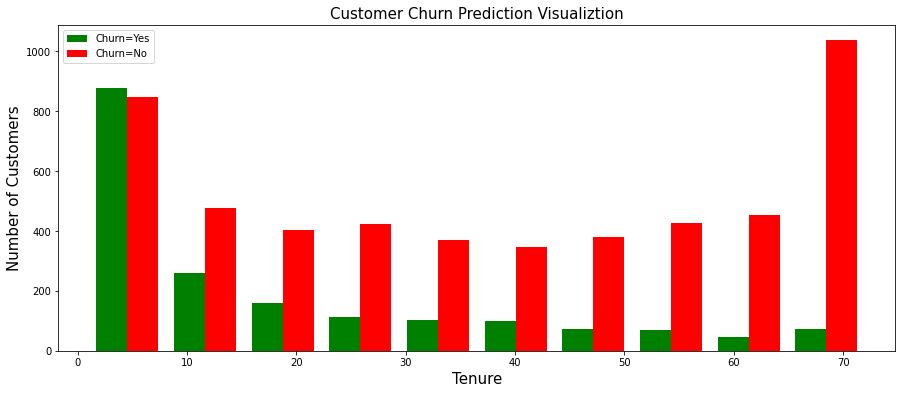

In [14]:
tenure_churn_no = df_new[df_new["Churn"] == "No"]["tenure"]
tenure_churn_yes = df_new[df_new["Churn"] == "Yes"]["tenure"]

plt.figure(figsize = (15,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color = ["green","red"], label = ["Churn=Yes", "Churn=No"])
plt.legend(loc = "best")

size = 15
plt.xlabel("Tenure", fontsize = size)
plt.ylabel("Number of Customers", fontsize = size)
plt.title("Customer Churn Prediction Visualiztion", fontsize = size)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


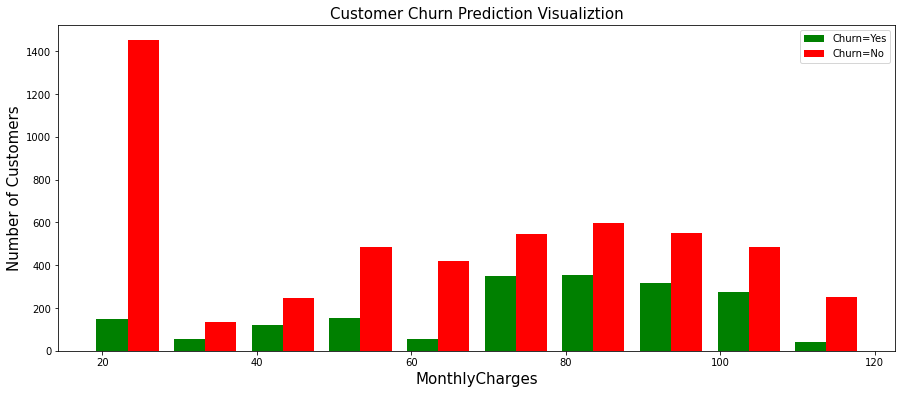

In [15]:
MonthlyCharges_churn_no = df_new[df_new["Churn"] == "No"]["MonthlyCharges"]
MonthlyCharges_churn_yes = df_new[df_new["Churn"] == "Yes"]["MonthlyCharges"]

plt.figure(figsize = (15,6))
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color = ["green","red"], label = ["Churn=Yes", "Churn=No"])
plt.legend(loc = "best")

size = 15
plt.xlabel("MonthlyCharges", fontsize = size)
plt.ylabel("Number of Customers", fontsize = size)
plt.title("Customer Churn Prediction Visualiztion", fontsize = size)
plt.show()

In [16]:
def object_unique_values(dataframe):
    for col in dataframe.columns:

        if dataframe[col].dtype == "object":

            print(f"{col} : {dataframe[col].unique()}")

In [17]:
object_unique_values(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
# Benzer anlamı taşıyor "No" ile !!

df_new.replace("No phone service","No",inplace = True)
df_new.replace("No internet service","No", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
object_unique_values(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:

    df_new[col].replace({"Yes" : 1, "No" : 0}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
object_unique_values(df_new)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df_new.replace({"Female" : 1, "Male" : 0}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
# Hepsi Sayısal Değere Döndü !

last_df = pd.get_dummies(data = df_new, columns=['InternetService','Contract','PaymentMethod'] )

last_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [24]:
last_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4068,1,0,1,1,14,1,0,0,0,0,0,0,0,1,19.50,272.00,0,0,0,1,0,1,0,0,0,0,1
3087,1,0,0,0,8,1,1,0,0,0,0,1,0,1,87.05,762.10,1,0,1,0,1,0,0,0,0,1,0
4640,0,0,1,1,1,1,0,0,0,0,0,0,0,1,70.00,70.00,1,0,1,0,1,0,0,0,0,1,0
5635,1,0,1,0,22,1,0,0,1,1,0,0,0,1,54.70,1178.75,0,1,0,0,1,0,0,0,0,0,1
6454,1,0,0,0,41,1,1,1,0,0,0,0,0,1,81.30,3190.65,0,0,1,0,1,0,0,0,1,0,0


In [25]:
for col in last_df.columns :
    print(f"{col} : {last_df[col].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [26]:
# Şimdi Değerleri 0 ile 1 arasında çevireceğiz!!

convert_col = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

last_df[convert_col] = scaler.fit_transform(last_df[convert_col])

In [27]:
for col in last_df.columns :
    print(f"{col} : {last_df[col].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Train Test Split

In [28]:
X = last_df.drop("Churn", axis = 1)
y = last_df["Churn"]

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [30]:
X_train.shape,X_test.shape

((5625, 26), (1407, 26))

# Build a Model (ANN) In TensorFlow

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(26, input_shape = (26,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 100,  validation_data = (X_test, y_test))

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5391 - accuracy: 0.7124 - val_loss: 0.4631 - val_accuracy: 0.7690
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7945 - val_loss: 0.4470 - val_accuracy: 0.7875
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8009 - val_loss: 0.4446 - val_accuracy: 0.7839
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8039 - val_loss: 0.4450 - val_accuracy: 0.7882
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8091 - val_loss: 0.4447 - val_accuracy: 0.7932
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8073 - val_loss: 0.4414 - val_accuracy: 0.7918
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8087 - val_loss: 0.4471 - val_accuracy: 0.7861

In [33]:
def history_graph(history):


    plt.figure(figsize = (15,6))

    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")
    size = 15
    plt.legend(loc = "best")
    plt.title("Accuracy Graphs" ,fontsize = size )
    plt.xlabel("Epochs",fontsize = size)
    plt.ylabel("Accuracy Values", fontsize = size)



    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    size = 15
    plt.legend(loc = "best")
    plt.title("Loss Graphs" ,fontsize = size )
    plt.xlabel("Epochs",fontsize = size)
    plt.ylabel("Loss Values", fontsize = size)

    plt.tight_layout()
    plt.show()

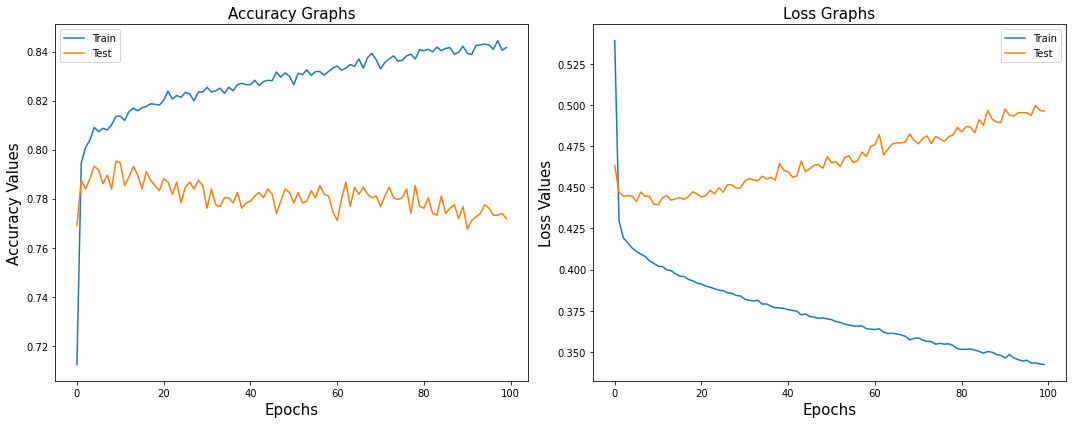

In [34]:
# Kısacası Overfit 
history_graph(history)

In [35]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7719


[0.49626874923706055, 0.7718549966812134]

In [36]:
y_pred = model.predict(X_test)
y_pred

array([[0.2989481 ],
       [0.37151876],
       [0.00437316],
       ...,
       [0.63673604],
       [0.6073662 ],
       [0.8568497 ]], dtype=float32)

In [37]:
from sklearn.metrics import precision_score,recall_score


for i in [0.30, 0.35, 0.40, 0.45, 0.50 , 0.55, 0.60, 0.65, 0.70, 0.75]:
    
    classes = [1 if val > i else 0 for val in y_pred]
    precision = round(precision_score(y_test, classes),4)
    recall = round(recall_score(y_test, classes),4)
    diff = round(np.abs(precision-recall),4)
    
    print(f"Thresholds : {i:{10}} , Precission Score : {precision:{10}} , Recall Score : {recall:{10}} , Diff : {diff}")

Thresholds :        0.3 , Precission Score :     0.5418 , Recall Score :     0.7304 , Diff : 0.1886
Thresholds :       0.35 , Precission Score :     0.5844 , Recall Score :     0.6961 , Diff : 0.1117
Thresholds :        0.4 , Precission Score :     0.6116 , Recall Score :     0.6446 , Diff : 0.033
Thresholds :       0.45 , Precission Score :     0.6197 , Recall Score :     0.5711 , Diff : 0.0486
Thresholds :        0.5 , Precission Score :     0.6381 , Recall Score :     0.4926 , Diff : 0.1455
Thresholds :       0.55 , Precission Score :     0.6522 , Recall Score :     0.4412 , Diff : 0.211
Thresholds :        0.6 , Precission Score :     0.6473 , Recall Score :     0.3824 , Diff : 0.2649
Thresholds :       0.65 , Precission Score :     0.6531 , Recall Score :     0.3137 , Diff : 0.3394
Thresholds :        0.7 , Precission Score :     0.6829 , Recall Score :     0.2745 , Diff : 0.4084
Thresholds :       0.75 , Precission Score :     0.6846 , Recall Score :     0.2181 , Diff : 0.4665


In [38]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.49      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



In [41]:
def confusion_graph(y_true,y_pred):


    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (15,7))
    sns.heatmap(cm, cbar = False, annot = True, annot_kws = {"size" : 15}, fmt = "d", linewidths=0.3)

    size = 15
    plt.xlabel("Predicted",fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix Graphs", fontsize = size)
    plt.show()

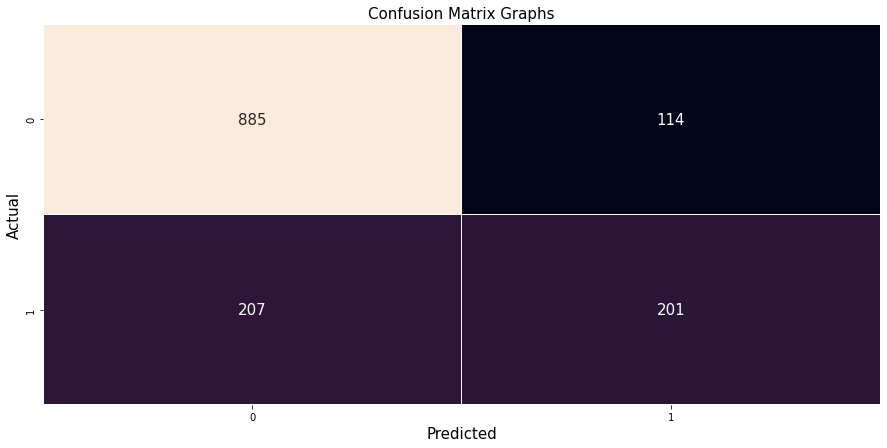

In [42]:
confusion_graph(y_test, y_pred)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.49      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



In [48]:
# 0 için precision
round(855 / (855 + 207),2)

0.81

In [52]:
# 0 için recall
round( 855 / (114 + 855),3)

0.882

In [57]:
# f1 Score : 0 için
round(2 * ( (0.81*0.882) / (0.81+0.882)),2)

0.84

In [49]:
# 1 için precision
round(201 / (201 + 114),2)

0.64

In [53]:
# 1 için recall
round( 201 / (201 + 207),2)

0.49

In [61]:
# f1 Score : 1 için
round(2 * ( (0.64*0.49) / (0.64+0.49)),2)

0.56